<a href="https://colab.research.google.com/github/Akash-Adak/Machine-Learning/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## 🌳 Decision Tree Classification: Full Concept

### 📘 What is a Decision Tree?
A **Decision Tree** is a flowchart-like structure used for decision-making and predictive modeling. It splits a dataset into subsets based on feature values, forming a tree where:
- **Root Node**: Represents the entire dataset and the first feature split.
- **Internal Nodes**: Represent decision points based on feature values.
- **Branches**: Represent outcomes of decisions.
- **Leaf Nodes**: Represent final class labels or outcomes.

---

### 🧠 Core Concepts

#### 1. **Entropy (H)**
Entropy measures the impurity or randomness in the dataset. It quantifies the uncertainty in predicting the class label.

**Formula:**
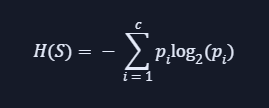\[


#### 2. **Information Gain (IG)**
Information Gain measures the reduction in entropy after a dataset is split on a feature. It helps identify the best feature to split on.
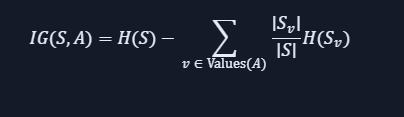

#### 3. **Gini Index (Alternative to Entropy)**
Gini Index measures impurity. Lower Gini means better purity.

**Formula:**
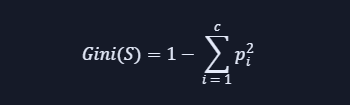

---

### 🧰 Splitting Criteria
- **Entropy + Information Gain**: Used in ID3 algorithm.
- **Gini Index**: Used in CART (Classification and Regression Trees).
- **Gain Ratio**: Used in C4.5 to handle bias in Information Gain.

---

### 🧪 Example: Weather Dataset
Suppose we want to predict whether someone will play outside based on:
- Outlook (Sunny, Overcast, Rain)
- Temperature (Hot, Mild, Cool)
- Humidity (High, Normal)
- Windy (True, False)

| Outlook  | Temperature | Humidity | Windy | Play |
|----------|-------------|----------|-------|------|
| Sunny    | Hot         | High     | False | No   |
| Overcast | Mild        | High     | True  | Yes  |
| Rain     | Cool        | Normal   | False | Yes  |

The Decision Tree will:
1. Calculate entropy of the full dataset.
2. Compute Information Gain for each feature.
3. Choose the feature with the highest IG to split.
4. Repeat recursively for each branch until:
   - All data in a node belongs to one class.
   - No more features to split.
   - A stopping condition (e.g., max depth) is met.

---

### ✅ Advantages
- Easy to interpret and visualize.
- Handles both numerical and categorical data.
- Requires little data preprocessing.

### ⚠️ Limitations
- Prone to **overfitting** (solved via pruning or limiting depth).
- Can be **unstable** with small data changes.
- Biased toward features with more levels (solved using Gain Ratio).

---

### 📌 Use Cases
- Medical diagnosis
- Credit scoring
- Customer churn prediction
- Weather forecasting



In [17]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Read the CSV file from the specified path into a DataFrame
df = pd.read_csv(R"/content/drive/MyDrive/ML/weather.csv")

# Display the first 5 rows of the DataFrame to preview the data
df.head(5)


,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rain,mild,high,False,yes
4,rain,cool,normal,False,yes


In [18]:
# Import LabelEncoder from scikit-learn to convert categorical values into numeric labels
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Apply label encoding to each categorical column and store the result in new columns
df['outlook_n'] = le.fit_transform(df['outlook'])        # Encode 'outlook' column
df['temperature_n'] = le.fit_transform(df['temperature'])# Encode 'temperature' column
df['humidity_n'] = le.fit_transform(df['humidity'])      # Encode 'humidity' column
df['windy_n'] = le.fit_transform(df['windy'])            # Encode 'windy' column
df['play_n'] = le.fit_transform(df['play'])              # Encode 'play' column

# Display the updated DataFrame with new encoded columns
df


,outlook,temperature,humidity,windy,play,outlook_n,temperature_n,humidity_n,windy_n,play_n
0,sunny,hot,high,False,no,2,1,0,0,0
1,sunny,hot,high,True,no,2,1,0,1,0
2,overcast,hot,high,False,yes,0,1,0,0,1
3,rain,mild,high,False,yes,1,2,0,0,1
4,rain,cool,normal,False,yes,1,0,1,0,1
5,rain,cool,normal,True,no,1,0,1,1,0
6,overcast,cool,normal,True,yes,0,0,1,1,1
7,sunny,mild,high,False,no,2,2,0,0,0
8,sunny,cool,normal,False,yes,2,0,1,0,1
9,rain,mild,normal,False,yes,1,2,1,0,1


In [19]:
# Drop the original categorical columns since they've been encoded into numeric versions
df = df.drop(['outlook', 'temperature', 'humidity', 'windy', 'play'], axis=1)

# Display the cleaned DataFrame with only the encoded columns
df


,outlook_n,temperature_n,humidity_n,windy_n,play_n
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [20]:
# Select the first 4 columns (features) from the DataFrame
x = df.iloc[:, :4]

# Display the feature matrix
x


,outlook_n,temperature_n,humidity_n,windy_n
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0
5,1,0,1,1
6,0,0,1,1
7,2,2,0,0
8,2,0,1,0
9,1,2,1,0


In [21]:
# Select the 5th column (index 4) as the target variable (label)
y = df.iloc[:, 4]

# Display the target vector
y


,play_n
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


In [22]:
# Import the train_test_split function to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# - x: feature matrix
# - y: target vector
# - test_size=0.3: 30% of the data will be used for testing
# - random_state=42: ensures reproducibility of the split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [23]:
# Import the DecisionTreeClassifier from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model with specified hyperparameters
model = DecisionTreeClassifier(
    criterion='entropy',        # Use entropy to measure information gain
    splitter='best',            # Choose the best split at each node
    max_depth=5,                # Limit the depth of the tree to prevent overfitting
    min_samples_split=2         # Minimum number of samples required to split an internal node
)


In [24]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [25]:
# Use the trained Decision Tree model to make predictions on the test set
y_pred = model.predict(X_test)

# Print the predicted labels
print(y_pred)


[1 0 0 1 1]


In [26]:
# Import evaluation metrics from scikit-learn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)

# Generate the confusion matrix to visualize prediction performance
cm = confusion_matrix(Y_test, y_pred)

# Create a detailed classification report including precision, recall, and F1-score
cr = classification_report(Y_test, y_pred, zero_division=0)

# Print the accuracy as a percentage
print("The accuracy is {}%".format(accuracy * 100))

# Print the confusion matrix
print("The confusion matrix is")
print(cm)

# Print the classification report
print("The classification report is")
print(cr)


The accuracy is 60.0%
The confusion matrix is
[[1 1]
 [1 2]]
The classification report is
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



[Text(0.6666666666666666, 0.875, 'humidity_n <= 0.5\nentropy = 0.918\nsamples = 9\nvalue = [3, 6]\nclass = no'),
 Text(0.5, 0.625, 'outlook_n <= 1.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]\nclass = yes'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'windy_n <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]\nclass = no'),
 Text(0.16666666666666666, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = no'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = yes'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = yes'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = no'),
 Text(0.75, 0.75, '  False')]

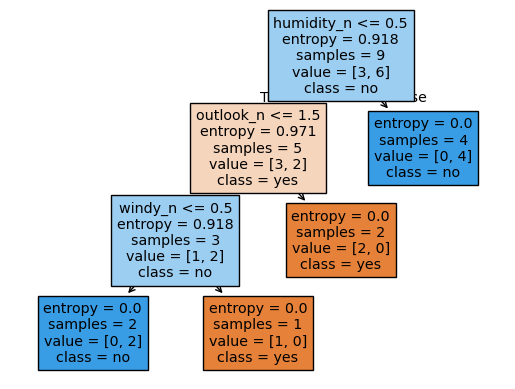

In [27]:
from sklearn import tree
tree.plot_tree(model,max_depth=7,feature_names=['outlook_n','temp_n','humidity_n','windy_n'],class_names=['yes','no'],filled=True,impurity=True)